# Basic Testing

## Module Imports

In [2]:
import sys
sys.path.append(r"C:\Users\user\Desktop\PhD\Bruno Paper\Code\Approach B")
import numpy as np
import random as rand
from Trajectory import Trajectory
from System import System
from traj_util import list2array, array2list
from traj2vec import traj2vec, vec2traj
import trajectory_functions as traj_funcs
import residual_functions as res_funcs
from my_fft import my_fft, my_ifft
import matplotlib.pyplot as plt
from my_min import my_min
from systems import lorenz
from trajectory_definitions import unit_circle_3d as uc3
import h5py

# %matplotlib qt

## Define system (and parameters) and mean

In [3]:
sys = System(lorenz)

mean = np.zeros(3)
mean[2] = 23.042103969255397
# mean[2] = 23

## Utility functions for unpacking HDF5 trajectory

In [4]:
def unpack_traj(filename):
    data = h5py.File(filename, 'r')
    traj = my_fft(np.transpose(data['X'][:, :]))
    traj = my_ifft(traj)
    freq = data['ω'][()]
    stats = data['stats']
    return traj, freq, stats

def change_res(traj, disc):
    traj_freq = my_fft(traj)
    traj_pad = np.zeros([np.shape(traj)[0], (disc//2) + 1], dtype = complex)
    for i in range(np.shape(traj_freq)[1]):
        try:
            traj_pad[:, i] = traj_freq[:, i]
        except IndexError:
            break
    return my_ifft(traj_pad)

def integrate_traj_array(traj):
    traj_freq = my_fft(traj)
    return np.real(traj_freq[:, 0])[0]

## Define a bunch of initial guesses

### Smallest UPO

In [5]:
# traj, init_freq, stats = unpack_traj('tmpfd73yG.orb')
# traj = change_res(traj, 18)
# traj_freq = my_fft(traj)
# traj_freq[:, 0] = 0
# init_traj = Trajectory(traj_freq)

# # if you want to make the mean correct for this UPO
# mean[2] = traj_freq[2, 0]

### Random Noise

In [7]:
T = 1.5586522099705225
# T = 6
init_traj = Trajectory(array2list(np.zeros([int(T*10), 3], dtype = complex)))
for i in range(1, init_traj.shape[0]):
    for j in range(3):
        init_traj[i, j] = 0.1*(rand.gauss(0, 1) + 1j*rand.gauss(0, 1))
init_freq = (2*np.pi)/T

## Perform optimisation (with options)

In [8]:
op_traj = init_traj
op_freq = init_freq
traces = None

In [9]:
maxiter = 50

op_traj, op_freq, traces, sol = my_min(op_traj, op_freq, sys, mean, iter = maxiter, traces = traces)

print()
print(sol.message)
print("Period of orbit: " + str((2*np.pi)/op_freq))
print("Global Residual: " + str(res_funcs.global_residual(op_traj, sys, op_freq, mean)))

# print(res_funcs.local_residual(init_traj, sys, init_freq, mean).modes)

# disc = 10000
# disc = None
# op_traj.plot(disc = disc, mean = mean, proj = 'xz')
op_traj.plot(mean = mean)


AttributeError: 'int' object has no attribute 'dtype'

## Plot results

### Trajectory

In [71]:
# op_traj.plot(disc = disc, mean = mean)
# op_traj.plot(disc = disc, mean = mean, proj = 'xz')
# op_traj.plot(disc = disc, mean = mean, proj = 'xy')
# op_traj.plot(disc = disc, mean = mean, proj = 'yz')
# op_traj.plot(disc = disc, mean = mean)

### Global residual

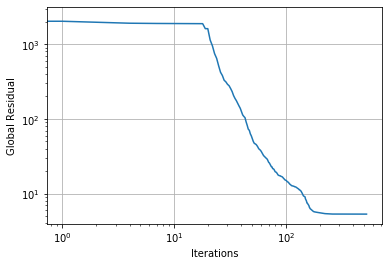

In [20]:
plt.figure(1)
plt.loglog(traces['gr'])
plt.xlabel("Iterations")
plt.ylabel("Global Residual")
plt.grid()
plt.show()

### Average constraint

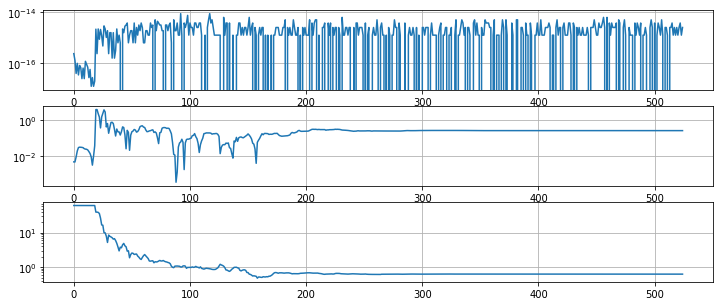

In [21]:
lr_zero_mode = np.zeros([3, len(traces['lr'])], dtype = complex)
for i in range(len(traces['lr'])):
    lr_zero_mode[:, i] = traces['lr'][i][:, 0]

_, (ax1, ax2, ax3) = plt.subplots(figsize = (12, 5), nrows = 3)
ax1.semilogy(np.abs(lr_zero_mode[0, :]))
ax2.semilogy(np.abs(lr_zero_mode[1, :]))
ax3.semilogy(np.abs(lr_zero_mode[2, :]))

ax1.grid()
ax2.grid()
ax3.grid()

plt.show()